# Week 2 Homework - Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
print(f'Shape of dataset is {df.shape}')
df.head()

Shape of dataset is (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Figure size 500x500 with 0 Axes>

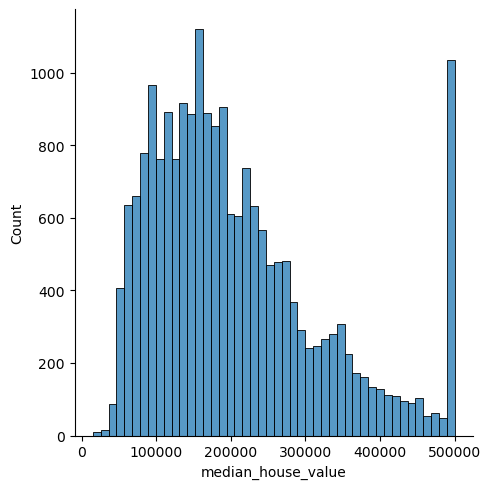

In [6]:
plt.figure(figsize=(5,5))
sns.displot(df['median_house_value'])
plt.show()

In [7]:
df_subset = df[df['ocean_proximity'].isin(('<1H OCEAN','INLAND'))]
print(f'Shape of dataset is {df_subset.shape}')
df_subset.head()

Shape of dataset is (15687, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [8]:
cols_for_use = df.columns[:-1]
df_subset = df_subset[cols_for_use]
df_subset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# Question 1  
There's one feature with missing values. What is it?

In [9]:
df_subset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Column `total_bedrooms` has missing values.

# Question 2  

What's the median (50% percentile) for variable `'population'`?

In [10]:
df_subset.describe()['population']

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

The median value of `'population'` is 1195.

In [11]:
# PREPARING THE DATASET

np.random.seed(42)

n = len(df_subset)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(f'Length of training data {n_train=}\nLength of Validation data {n_val=}\nLength of Test data {n_test=}')

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df_subset.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_subset.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_subset.iloc[idx[n_train+n_val:]].reset_index(drop=True)

Length of training data n_train=9413
Length of Validation data n_val=3137
Length of Test data n_test=3137


In [12]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

# del df_train['median_house_value'], df_val['median_house_value'], df_test['median_house_value']

In [15]:
# df_train.head()
# df_val.head()
cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [16]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

# Question 3  
## Imputing with 0

In [17]:
df_train_imputed_0 = df_train[cols].fillna(0)
w0, w = train_linear_regression(df_train_imputed_0, y_train)

df_val_imputed_0 = df_val[cols].fillna(0)
y_pred = w0 + df_val_imputed_0.dot(w)
print(f'RMSE is {rmse(y_val, y_pred):.2f}')

w0,w

RMSE is 0.34


(-9.763249478233947,
 array([-2.55938802e-01, -2.68233309e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

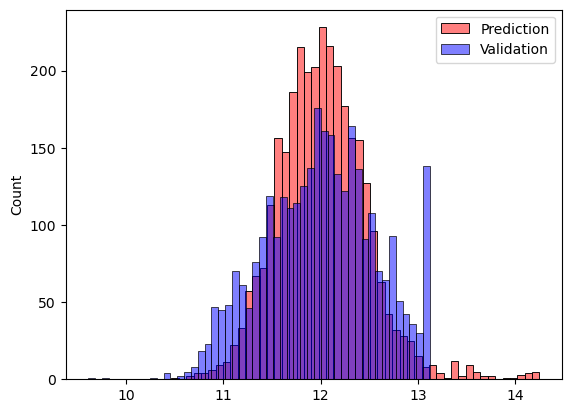

In [18]:
sns.histplot(y_pred, color='red', label='Prediction', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', label='Validation', alpha=0.5, bins=50)
plt.legend()
plt.show()

## Imputing with mean

In [19]:
df_train_imputed_mean = df_train[cols].fillna(df_train['total_bedrooms'].mean())
w0, w = train_linear_regression(df_train_imputed_mean, y_train)

df_val_imputed_mean = df_val[cols].fillna(df_train['total_bedrooms'].mean())
y_pred = w0 + df_val_imputed_mean.dot(w)
print(f'RMSE is {rmse(y_val, y_pred):.2f}')

w0,w

RMSE is 0.34


(-9.886133216126174,
 array([-2.57026361e-01, -2.68652914e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

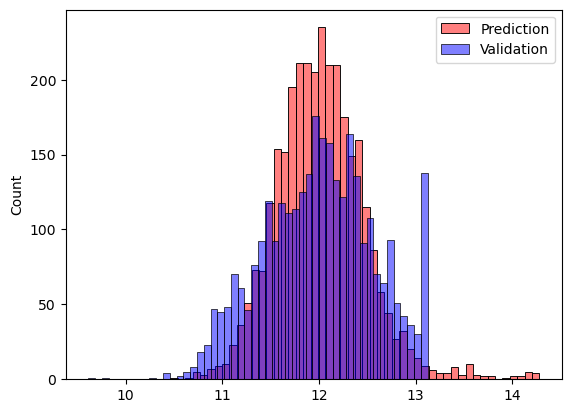

In [20]:
sns.histplot(y_pred, color='red', label='Prediction', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', label='Validation', alpha=0.5, bins=50)
plt.legend()
plt.show()

We observe that both option of filling null values give same RMSE upto 2 decimals.

# Question 4

In [21]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

X_train = df_train[cols].fillna(0)
X_val = df_val[cols].fillna(0)

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    
    print(f'{r=:>7}\t{rmse_val=:.2}')

r=      0	rmse_val=0.34
r=  1e-06	rmse_val=0.34
r= 0.0001	rmse_val=0.34
r=  0.001	rmse_val=0.34
r=   0.01	rmse_val=0.34
r=    0.1	rmse_val=0.34
r=      1	rmse_val=0.34
r=      5	rmse_val=0.35
r=     10	rmse_val=0.35


We observe that every regularization value gives same rmse so we will pick `0` as the smallest option. 

# Question 5

In [25]:
scores = {}
for seed in (0, 1, 2, 3, 4, 5, 6, 7, 8, 9):
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df_subset.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df_subset.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df_subset.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    X_train, X_val = df_train[cols].fillna(0), df_val[cols].fillna(0)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    scores[seed] = rmse(y_val, y_pred)

std = np.std(list(scores.values()))
print(f'Standard Deviation {std:.3f}')

Standard Deviation 0.005


# What's the value of std?  

The std is `0.0005`.  

# Question 6

In [34]:
np.random.seed(9)

np.random.seed(seed)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df_subset.iloc[idx[:n_train+n_val]].reset_index(drop=True)
df_test = df_subset.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = np.log1p(df_train['median_house_value'].values)
# y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

X_train = df_train[cols].fillna(0)
X_test = df_test[cols].fillna(0)
w0, w = train_linear_regression_reg(X_train, y_train, 0.001)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.33498993366048824

# What's the RMSE on the test dataset?  

RMSE for test dataset is 0.33